In [1]:
import DES
import plotting
import numpy as np
import simpy as sip
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics as st

In [2]:
mulamb = [(1,1.2), (1,1.1), (1,1.06), (1,1.02), (1,1.01)]

# FIFO queue
# for mu,lamd in mulamb:
#     rho = np.round((1/lamd)/(mu), 2)
#     print(rho)
#     name = f'servers_{rho}'
#     DES.run_simu(name, sip.Resource, mu, lamd, 50)

# Priority queue
# for mu,lamd in mulamb:
#     rho = np.round((1/lamd)/(mu), 2)
#     # print(rho)
#     name = f'servers_prio_{rho}'
#     DES.run_simu(name, sip.PriorityResource, mu, lamd, 50)

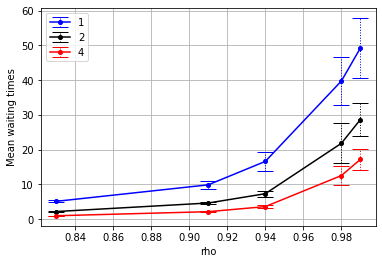

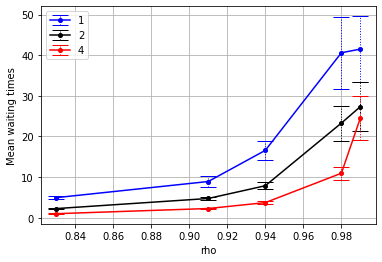

In [3]:
plotting.rho_v_wait('servers_prio')
plotting.rho_v_wait('servers')

0.83
4 server mean waiting times: 0.9910690738482006
2 server mean waiting times: 2.2481817950992253
1 server mean waiting times: 4.936625507969513


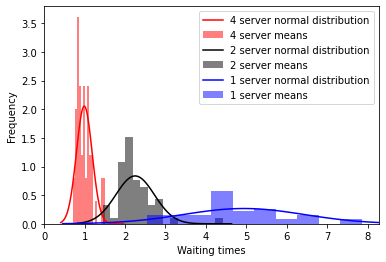

0.91
4 server mean waiting times: 2.26412342572846
2 server mean waiting times: 4.7347555909403845
1 server mean waiting times: 8.914694348396855


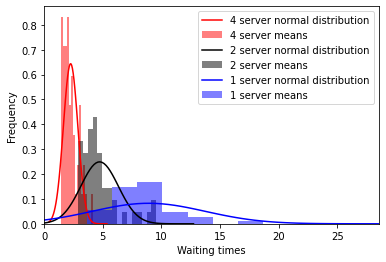

0.94
4 server mean waiting times: 3.7172514756160298
2 server mean waiting times: 7.872981775395667
1 server mean waiting times: 16.583717760002436


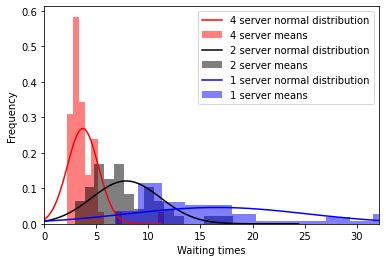

0.98
4 server mean waiting times: 10.954416282714531
2 server mean waiting times: 23.29907401878155
1 server mean waiting times: 40.61920521730528


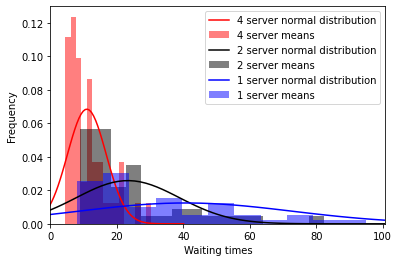

0.99
4 server mean waiting times: 24.591224182495747
2 server mean waiting times: 27.35776977136831
1 server mean waiting times: 41.519625785283466


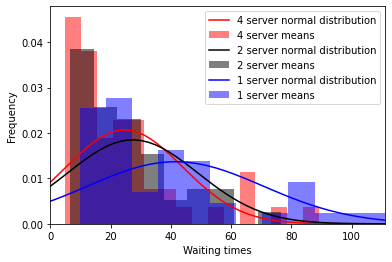

In [5]:
rhos = [np.round((1/l)/m, 2) for m,l in mulamb]
for r in rhos:
    print(r)
    name = f"servers_{r}_50"
    res_dict, cutoffs = DES.waiting_times(name)
    plotting.plots(res_dict, cutoffs)

In [ ]:
# Waiting time distributions
plt.hist(res_dict[1], bins=100, label='1 server')
plt.hist(res_dict[2], bins=100, alpha=0.5, label='2 servers')
plt.hist(res_dict[4], bins=100, alpha=0.4, label='4 servers')
plt.legend()
plt.show()

In [ ]:
# DES.run_simu('server_test', sip.Resource, 1, 1.01, 1000)
r, c = DES.waiting_times('server_test_1000')
plots(r, c)